In [3]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d 

In [ ]:
# Fitness Function
def f(x, y, communication_range, stationary_nodes_locations):
    fitness_value = 0
    for i in stationary_nodes_locations:
        if np.linalg.norm(np.array([x, y]) - i) < communication_range:
            fitness_value = fitness_value + 1
    return fitness_value

In [2]:
def Himmelblau(x,y):
    return ((((x/100)**2+(y/100)-11)**2) + ((((x/100)+(y/100)**2-7)**2)))

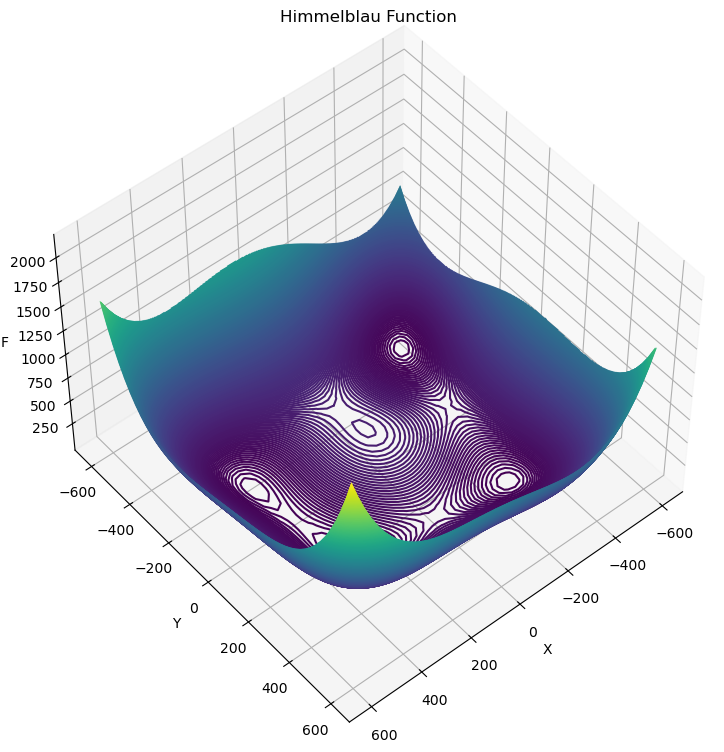

In [6]:
X=np.linspace(-600,600)
Y=np.linspace(-600,600)

x,y=np.meshgrid(X,Y)
F=Himmelblau(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,F,450)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F')
ax.set_title('Himmelblau Function')
ax.view_init(50,50)

#plt.contour(x,y,F,15)
plt.show()

Initial sensor positions:
Sensor 1: Position = [35.18929962 72.1406668 ]
Sensor 2: Position = [63.75826945 81.30538632]
Sensor 3: Position = [97.62256635 88.97936564]
Sensor 4: Position = [76.45619744 69.82484778]
Sensor 5: Position = [33.54981697 14.76855782]
Sensor 6: Position = [ 6.26360031 24.19017042]
Sensor 7: Position = [43.22814812 52.19962736]
Sensor 8: Position = [77.30835541 95.87409231]
Sensor 9: Position = [11.73204804 10.70041402]
Sensor 10: Position = [58.9694723  74.53980739]
Sensor 11: Position = [84.81503803 93.58320802]
Sensor 12: Position = [98.34262423 39.98016922]
Sensor 13: Position = [38.03351835 14.78086767]
Sensor 14: Position = [68.49344387 65.67619584]
Sensor 15: Position = [86.20625959  9.72579948]
Sensor 16: Position = [49.77769078 58.10819297]
Sensor 17: Position = [24.155704   16.90254061]
Sensor 18: Position = [85.95808364  5.85349222]
Sensor 19: Position = [47.06209039 11.58340013]
Sensor 20: Position = [45.70587613 97.99623263]
Sensor 21: Position = [

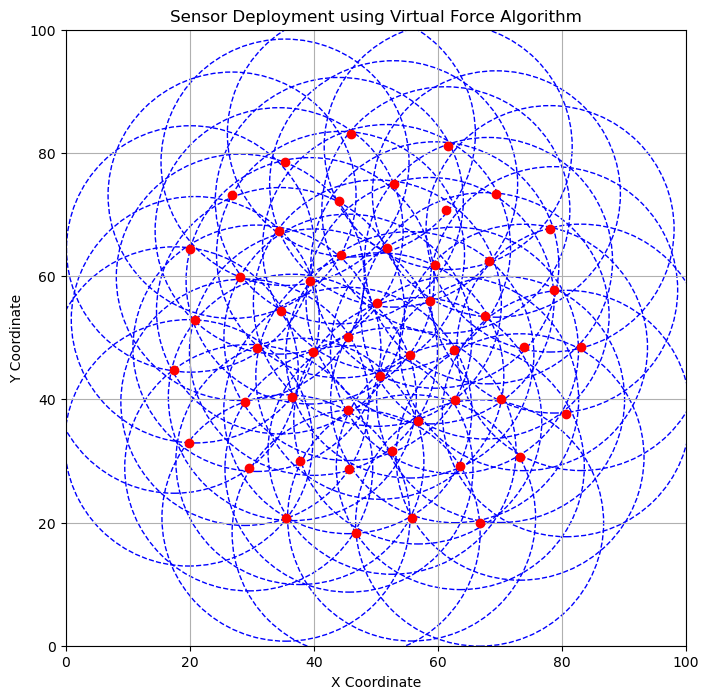

In [24]:
# Constants
FIELD_SIZE = 100   # Field size (100x100)
NUM_SENSORS = 50   # Number of sensors
SENSOR_RANGE = 20  # Sensor coverage radius
FORCE_STRENGTH = 5 # Force scaling factor
MAX_ITER = 100     # Maximum number of iterations

# Sensor class definition
class Sensor:
    def __init__(self, x, y):
        self.position = np.array([x, y], dtype=float)

# Virtual Force Algorithm function
def virtual_force_algorithm(sensors, field_size, sensor_range, force_strength, max_iter):
    for iteration in range(max_iter):
        forces = []
        
        # Compute forces for each sensor
        for i, sensor in enumerate(sensors):
            total_force = np.array([0.0, 0.0])
            
            # Repulsion from other sensors
            for j, other_sensor in enumerate(sensors):
                if i != j:
                    distance = np.linalg.norm(sensor.position - other_sensor.position)
                    if distance < sensor_range and distance > 0:
                        repulsion_force = force_strength * (sensor.position - other_sensor.position) / (distance ** 2)
                        total_force += repulsion_force
            
            # Attraction to the center of the field (optional, helps with boundary conditions)
            center_force = force_strength * (np.array([field_size / 2, field_size / 2]) - sensor.position) / field_size
            total_force += center_force

            forces.append(total_force)
        
        # Update sensor positions based on the computed forces
        for i, sensor in enumerate(sensors):
            sensor.position += forces[i]  # Move sensors based on the calculated force
        
        # Boundary conditions (keep sensors inside the field)
        for sensor in sensors:
            sensor.position = np.clip(sensor.position, 0, field_size)
    
    return sensors

# Initialize sensor positions randomly within the field
def initialize_sensors(num_sensors, field_size):
    sensors = []
    for _ in range(num_sensors):
        x, y = np.random.uniform(0, field_size, 2)
        sensors.append(Sensor(x, y))
    return sensors

# Plot the sensor positions
def plot_sensors(sensors, field_size):
    plt.figure(figsize=(8, 8))
    plt.xlim(0, field_size)
    plt.ylim(0, field_size)
    
    for sensor in sensors:
        circle = plt.Circle(sensor.position, SENSOR_RANGE, color='blue', fill=False, linestyle='dashed')
        plt.gca().add_artist(circle)
        plt.plot(sensor.position[0], sensor.position[1], 'ro')
    
    plt.title("Sensor Deployment using Virtual Force Algorithm")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.show()

# Main function to run the VFA
if __name__ == "__main__":
    sensors = initialize_sensors(NUM_SENSORS, FIELD_SIZE)
    print("Initial sensor positions:")
    for i, sensor in enumerate(sensors):
        print(f"Sensor {i+1}: Position = {sensor.position}")

    # Run the Virtual Force Algorithm
    final_sensors = virtual_force_algorithm(sensors, FIELD_SIZE, SENSOR_RANGE, FORCE_STRENGTH, MAX_ITER)
    
    print("\nFinal sensor positions after VFA:")
    for i, sensor in enumerate(final_sensors):
        print(f"Sensor {i+1}: Position = {sensor.position}")

    # Plot the final sensor positions
    plot_sensors(final_sensors, FIELD_SIZE)


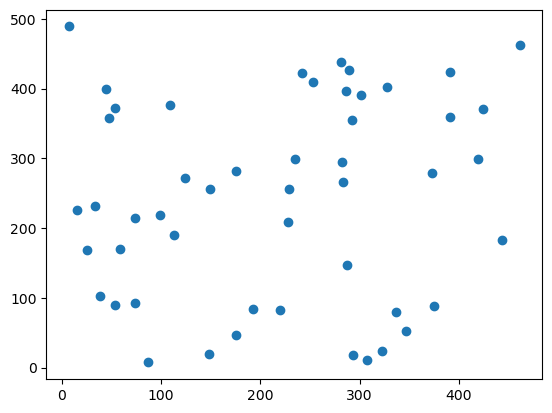

In [10]:
# Constants
NUM_MOBILE_NODES = 50
NUM_STATIONARY_NODES = 50
AREA_SIZE = 500
DETECTION_RADIUS = 7
MAX_ITERATIONS = 200
C1 = 1.5  # cognitive learning factor
C2 = 1.5  # social learning factor
C3 = 0.5  # virtual force factor
W = 0.7  # inertia weight for velocity
MAX_VELOCITY = 5.0

# Generate random positions for sensor nodes
np.random.seed(10)  # For reproducibility
mobile_nodes = np.random.rand(NUM_MOBILE_NODES, 2) * AREA_SIZE
stationary_nodes = np.random.rand(NUM_STATIONARY_NODES, 2) * AREA_SIZE

# Initialize PSO parameters for mobile nodes
velocities = np.random.rand(NUM_MOBILE_NODES, 2) * MAX_VELOCITY
pbest_positions = np.copy(mobile_nodes)
gbest_position = mobile_nodes[np.random.choice(range(NUM_MOBILE_NODES))]

plt.scatter(stationary_nodes[:,0],stationary_nodes[:,1])

In [3]:
# Define the virtual force function
def compute_virtual_forces(mobile_nodes, stationary_nodes, detection_radius):
    forces = np.zeros_like(mobile_nodes)
    
    for i, node in enumerate(mobile_nodes):
        force = np.array([0.0, 0.0])
        
        # Repulsive force from stationary nodes
        for stationary_node in stationary_nodes:
            dist = np.linalg.norm(node - stationary_node)
            if dist < detection_radius:
                repulsive_force = (node - stationary_node) / (dist + 1e-6)
                force += repulsive_force
        
        # Attractive force between mobile nodes to maintain coverage
        for j, other_node in enumerate(mobile_nodes):
            if i != j:
                dist = np.linalg.norm(node - other_node)
                if dist > detection_radius:
                    attractive_force = (other_node - node) / (dist + 1e-6)
                    force += attractive_force

        forces[i] = force

    return forces

In [4]:
# Define the fitness function (based on area coverage)
def compute_fitness(nodes, detection_radius):
    grid_size = 1
    grid_points = np.mgrid[0:AREA_SIZE:grid_size, 0:AREA_SIZE:grid_size].reshape(2, -1).T
    covered_points = np.zeros(len(grid_points))

    for node in nodes:
        distances = np.linalg.norm(grid_points - node, axis=1)
        covered_points += distances < detection_radius

    return np.sum(covered_points > 0) / len(grid_points)

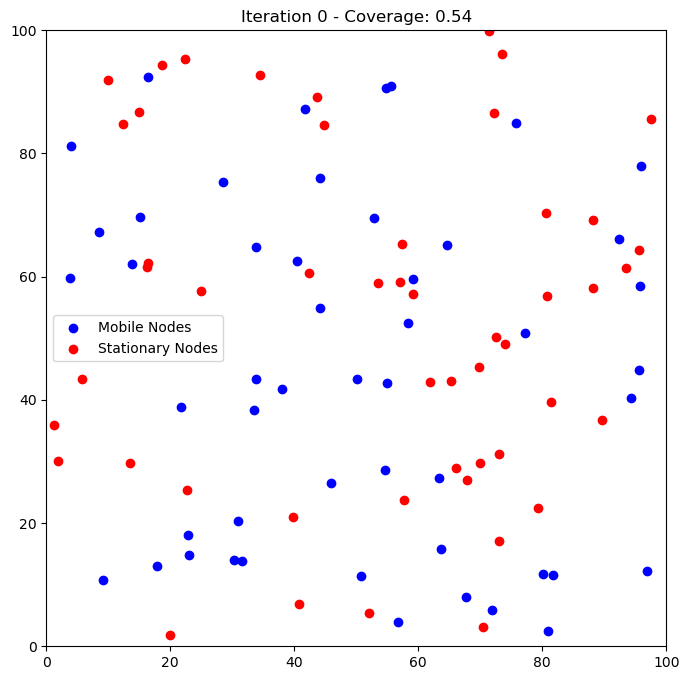

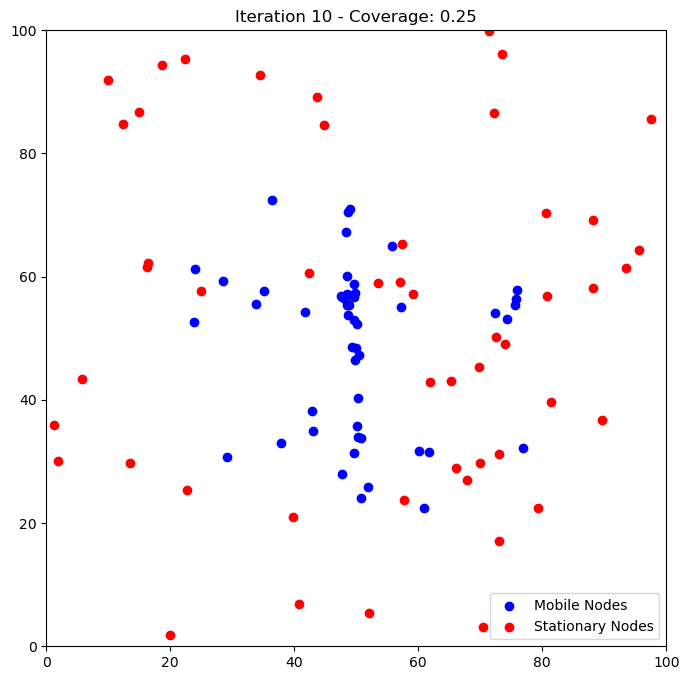

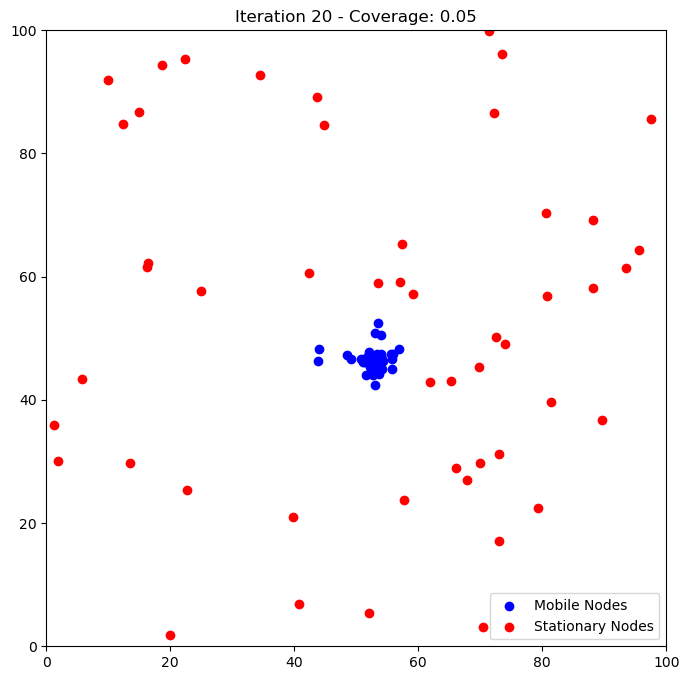

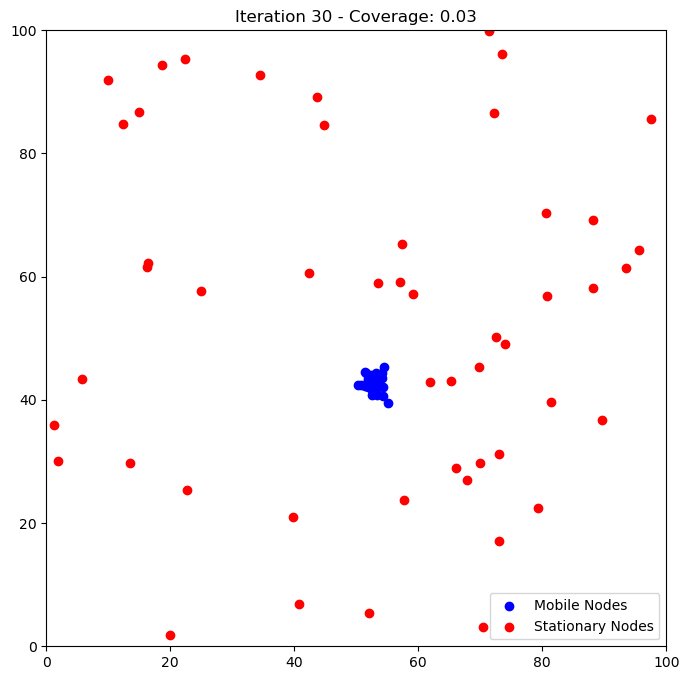

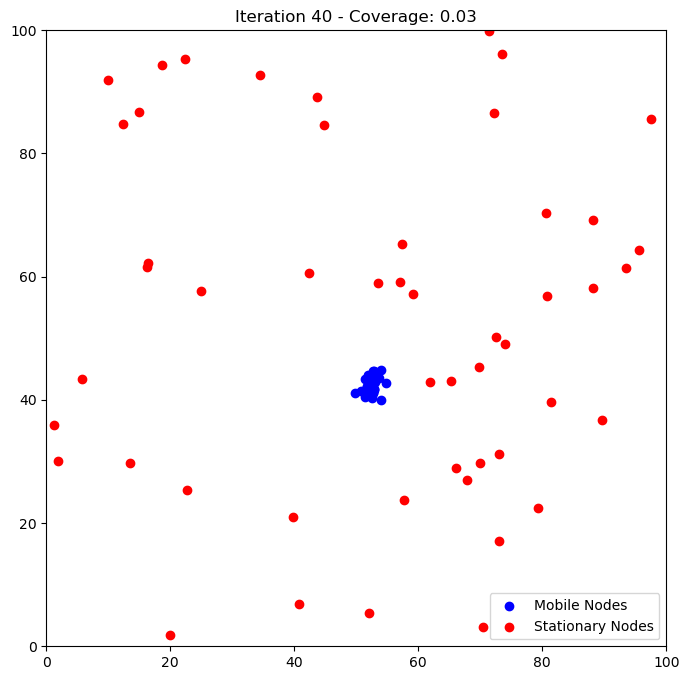

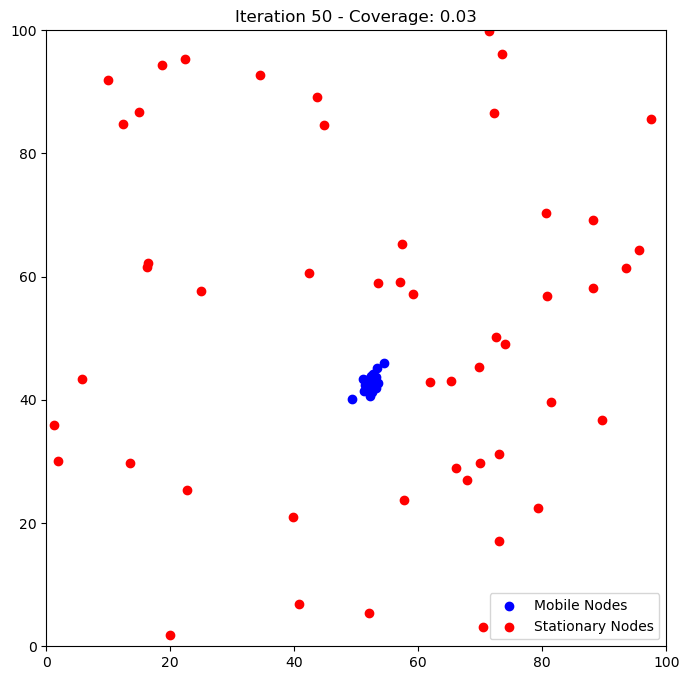

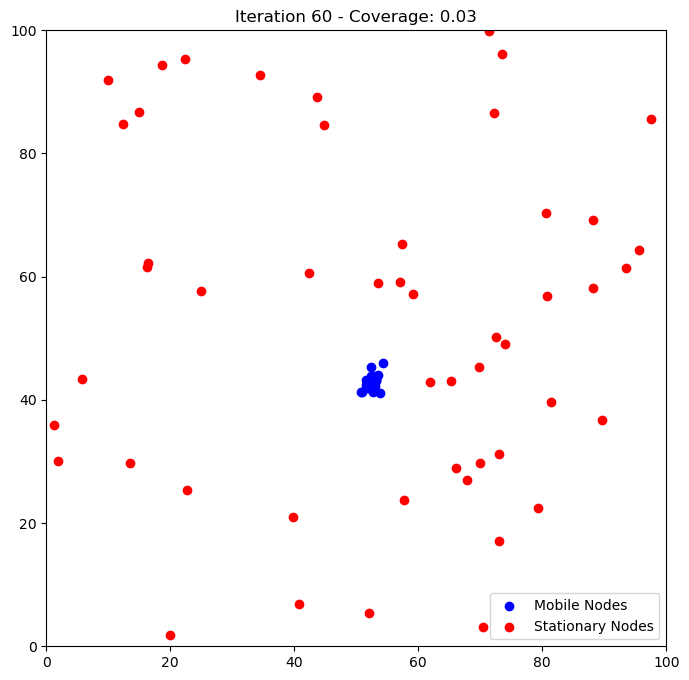

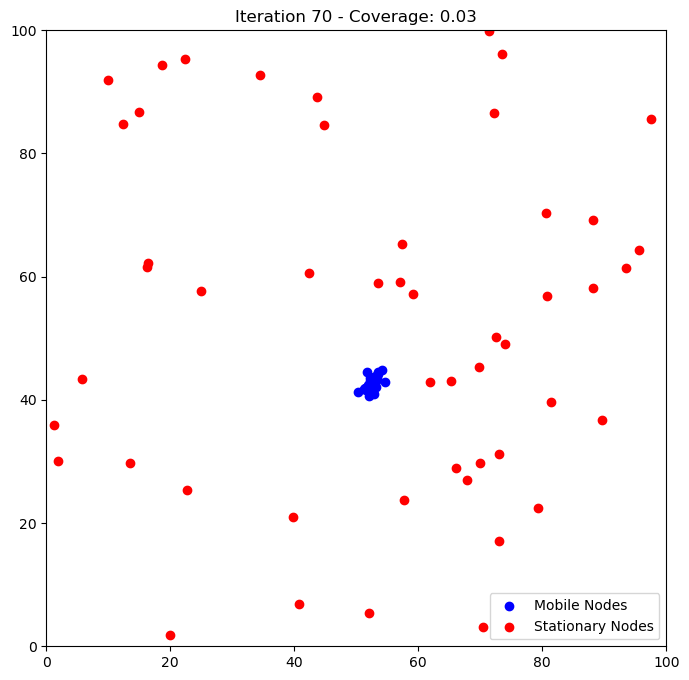

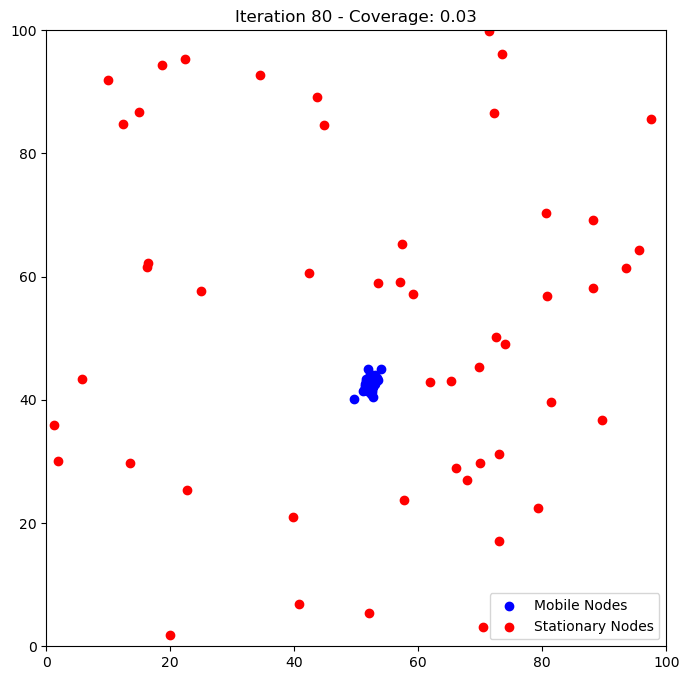

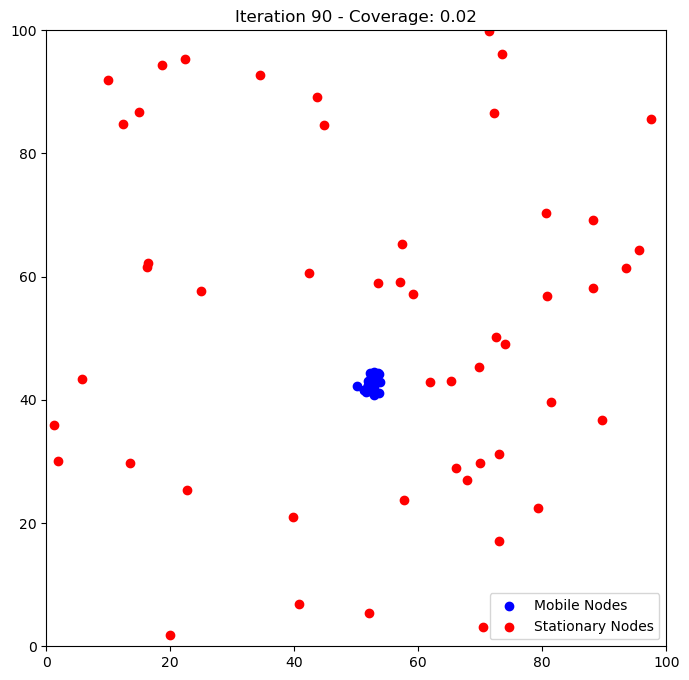

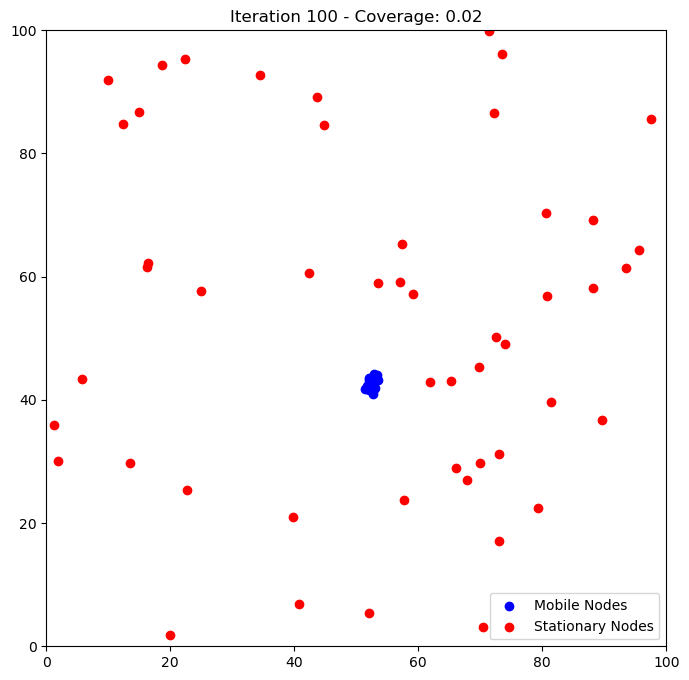

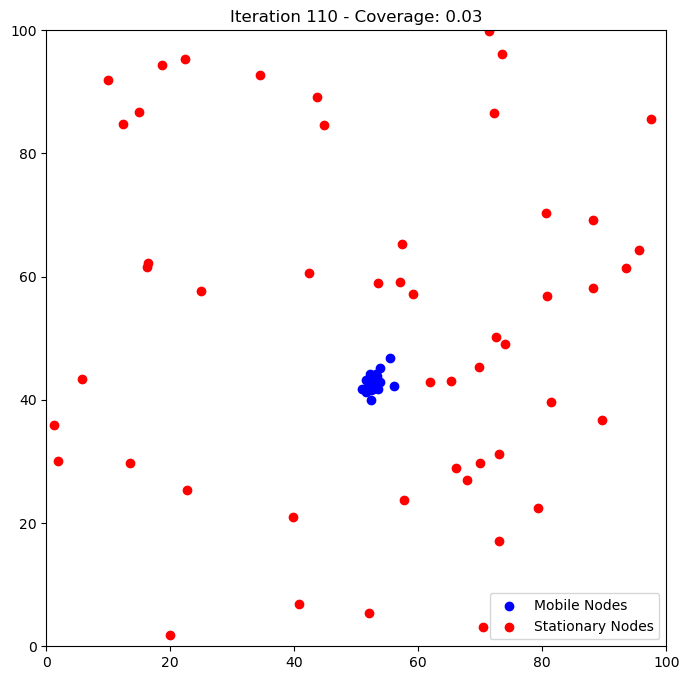

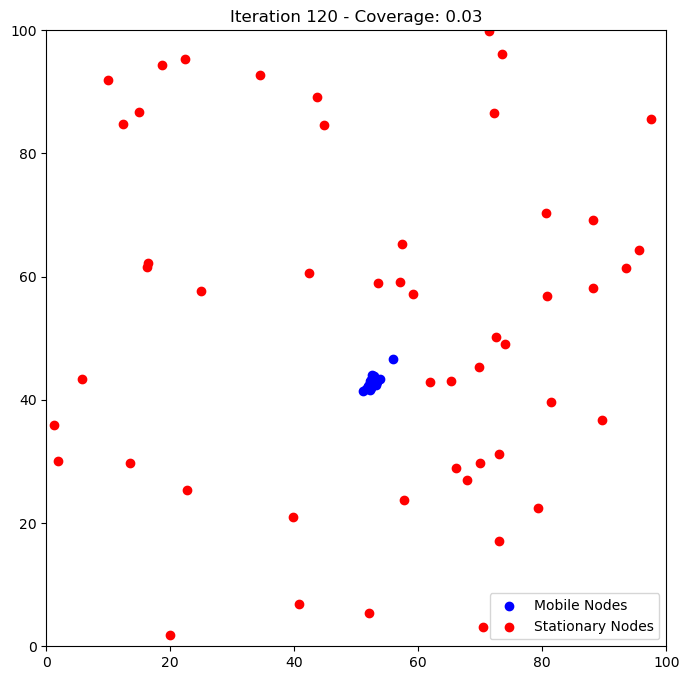

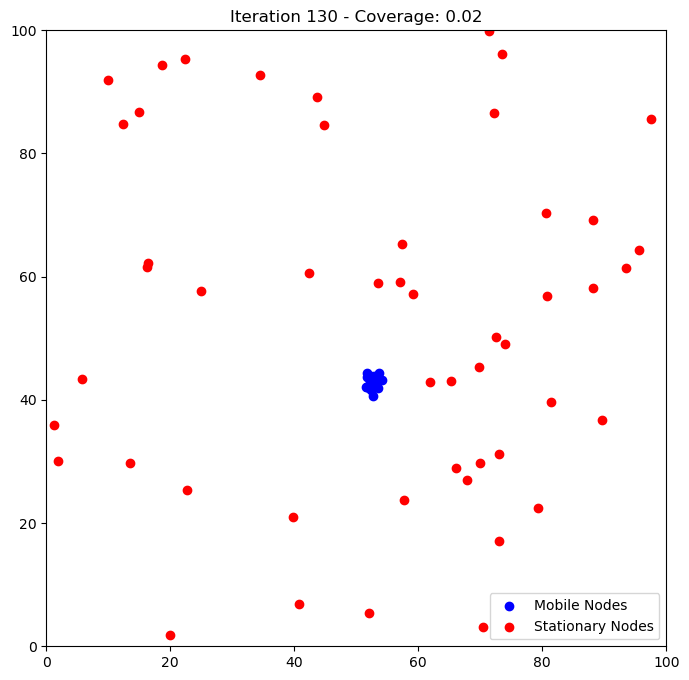

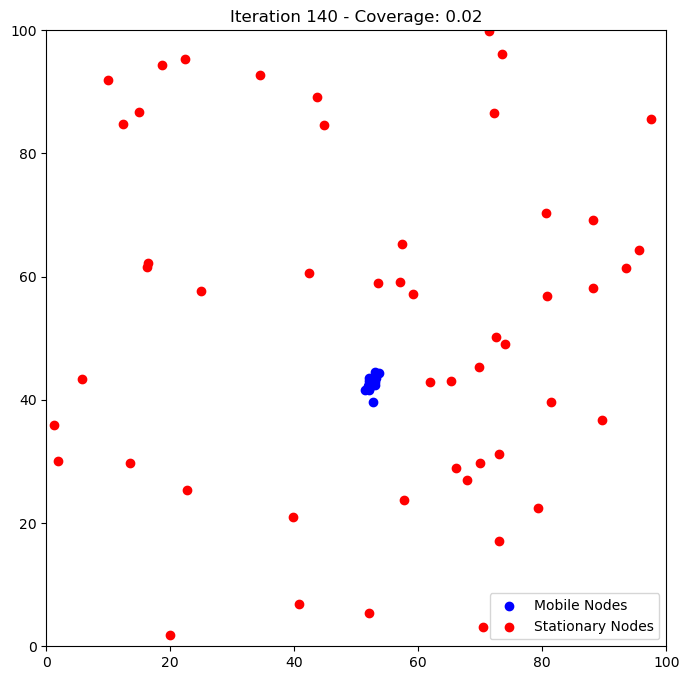

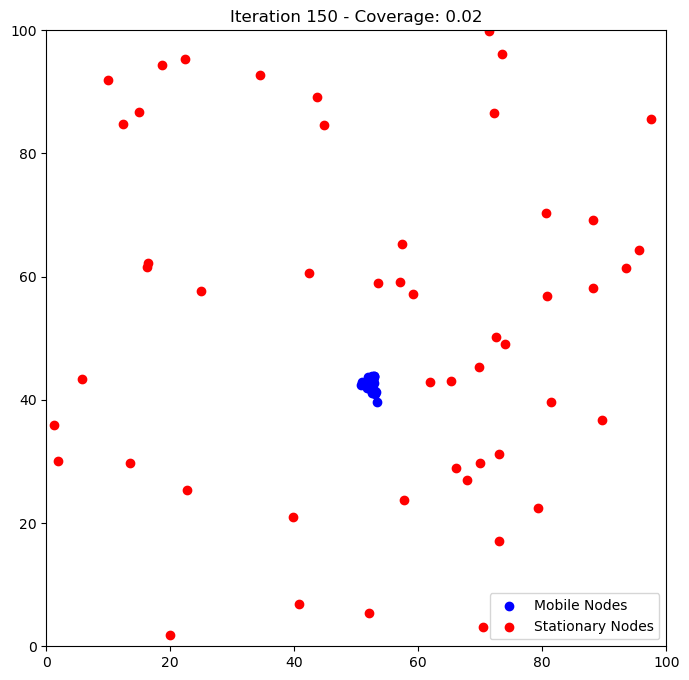

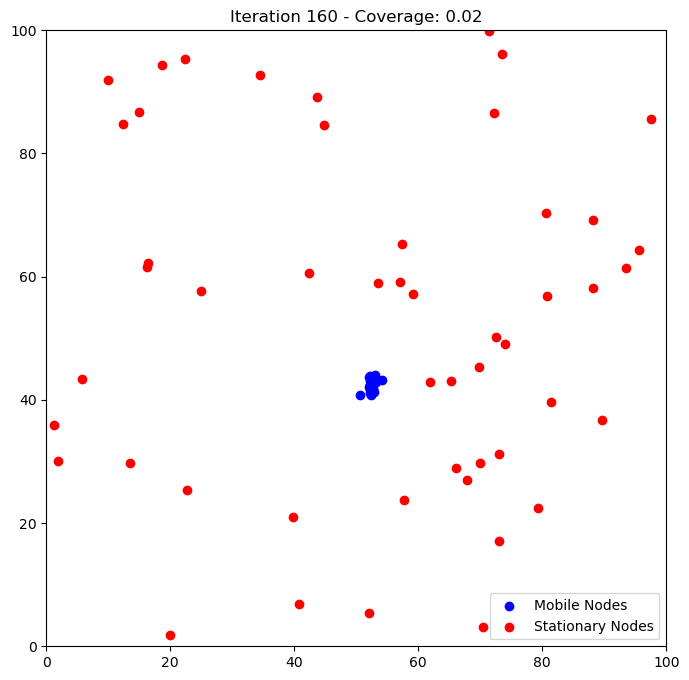

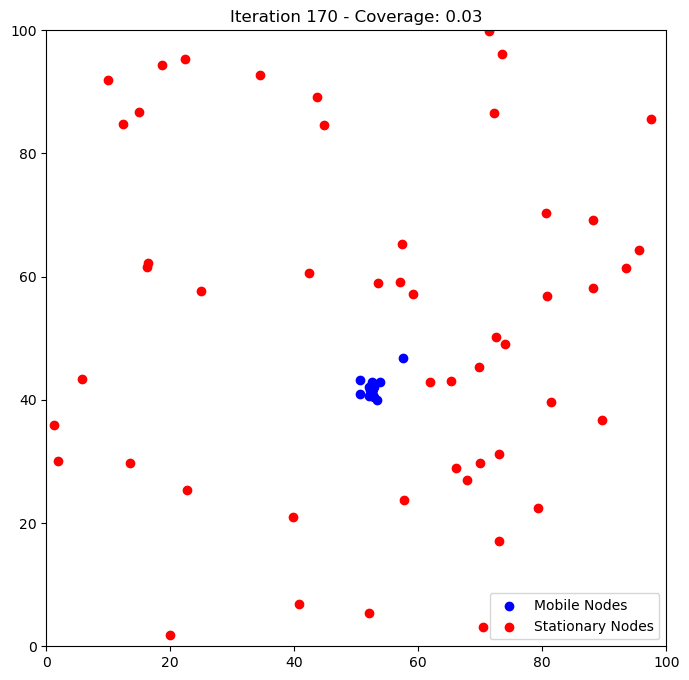

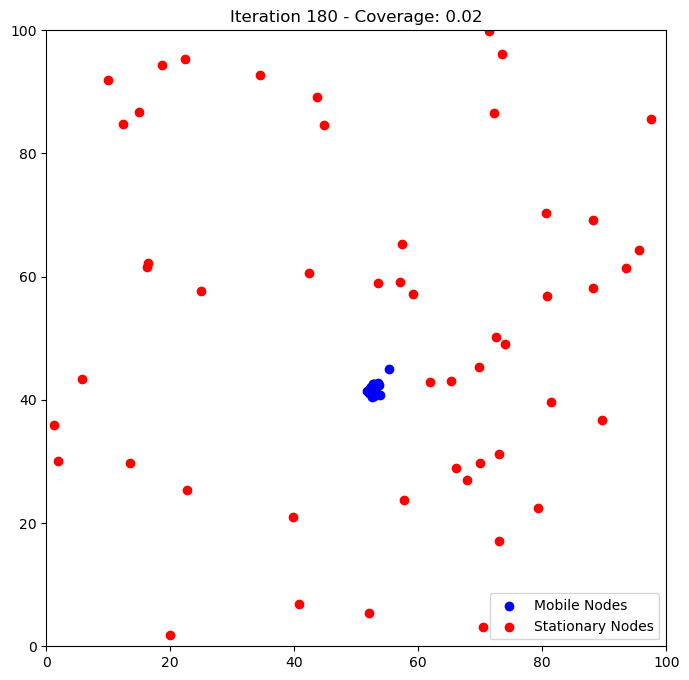

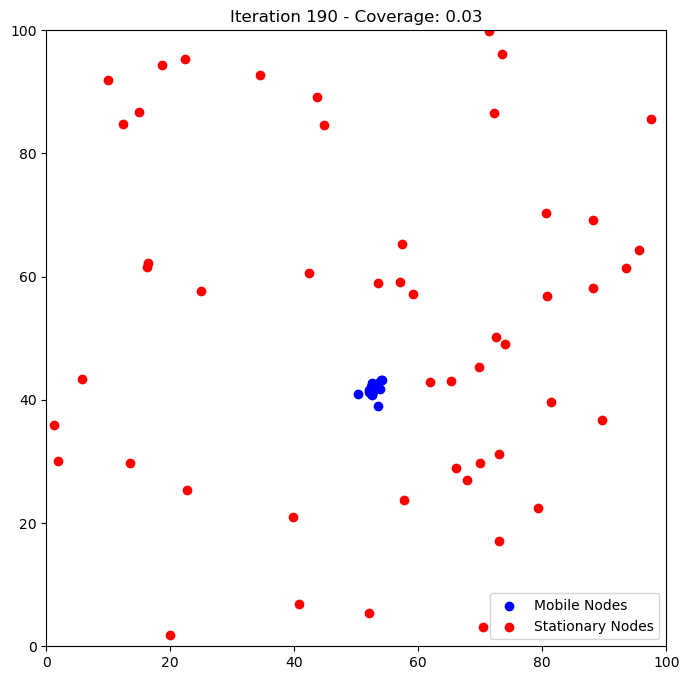

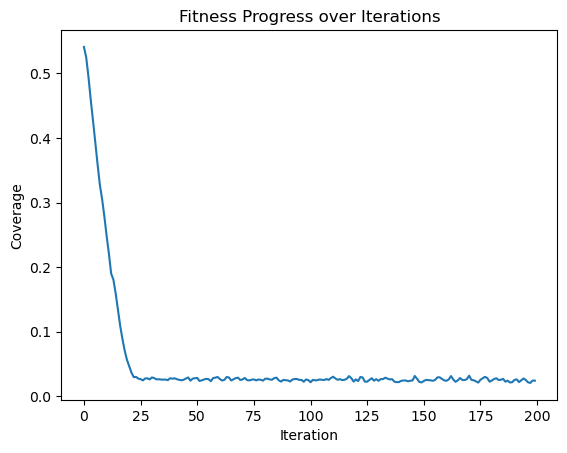

In [5]:
# Main VFPSO loop
fitness_progress = []

for iteration in range(MAX_ITERATIONS):
    # Calculate the virtual forces
    forces = compute_virtual_forces(mobile_nodes, stationary_nodes, DETECTION_RADIUS)

    # PSO velocity update with virtual forces
    for i in range(NUM_MOBILE_NODES):
        inertia = W * velocities[i]
        cognitive = C1 * np.random.rand() * (pbest_positions[i] - mobile_nodes[i])
        social = C2 * np.random.rand() * (gbest_position - mobile_nodes[i])
        force_influence = C3 * forces[i]
        
        velocities[i] = inertia + cognitive + social + force_influence

        # Limit velocity to max velocity
        velocities[i] = np.clip(velocities[i], -MAX_VELOCITY, MAX_VELOCITY)
        
        # Update positions
        mobile_nodes[i] += velocities[i]

    # Update personal best (pbest) and global best (gbest) based on fitness
    for i in range(NUM_MOBILE_NODES):
        fitness = compute_fitness(mobile_nodes, DETECTION_RADIUS)
        if fitness > compute_fitness(pbest_positions[i], DETECTION_RADIUS):
            pbest_positions[i] = np.copy(mobile_nodes[i])
    
    if fitness > compute_fitness(gbest_position, DETECTION_RADIUS):
        gbest_position = mobile_nodes[np.argmax([compute_fitness(pos, DETECTION_RADIUS) for pos in mobile_nodes])]

    # Track fitness progress
    fitness_progress.append(fitness)
    
    # Plot the positions and forces (every 10 iterations)
    if iteration % 10 == 0:
        plt.figure(figsize=(8, 8))
        plt.scatter(mobile_nodes[:, 0], mobile_nodes[:, 1], color='b', label='Mobile Nodes')
        plt.scatter(stationary_nodes[:, 0], stationary_nodes[:, 1], color='r', label='Stationary Nodes')
        plt.xlim(0, AREA_SIZE)
        plt.ylim(0, AREA_SIZE)
        plt.title(f'Iteration {iteration} - Coverage: {fitness:.2f}')
        plt.legend()
        plt.show()

# Plot fitness over iterations
plt.plot(fitness_progress)
plt.title('Fitness Progress over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Coverage')
plt.show()

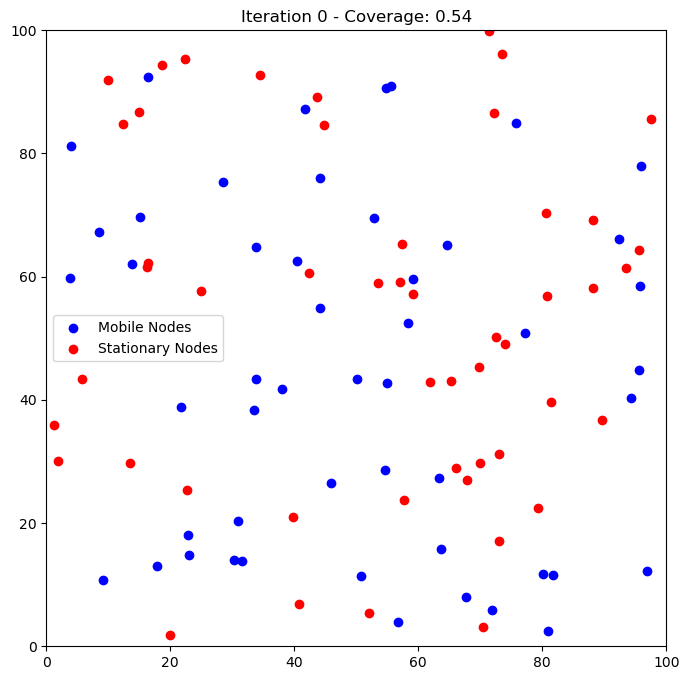

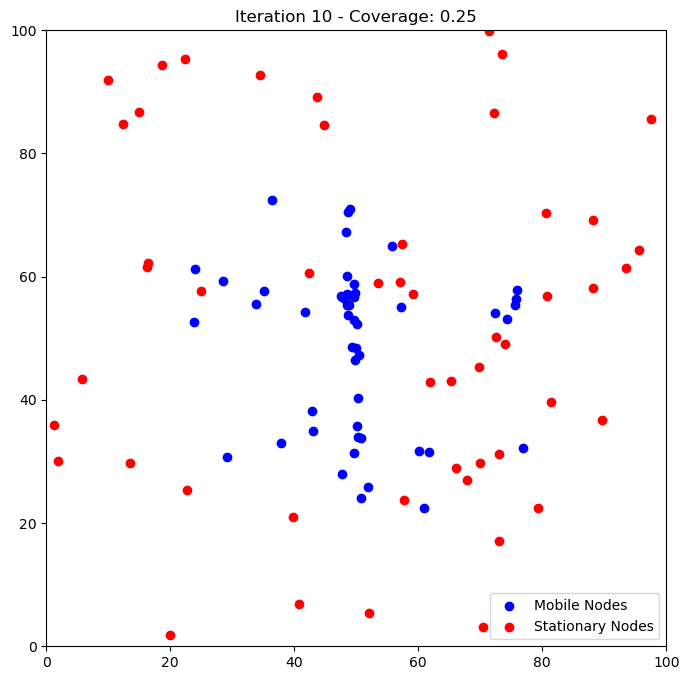

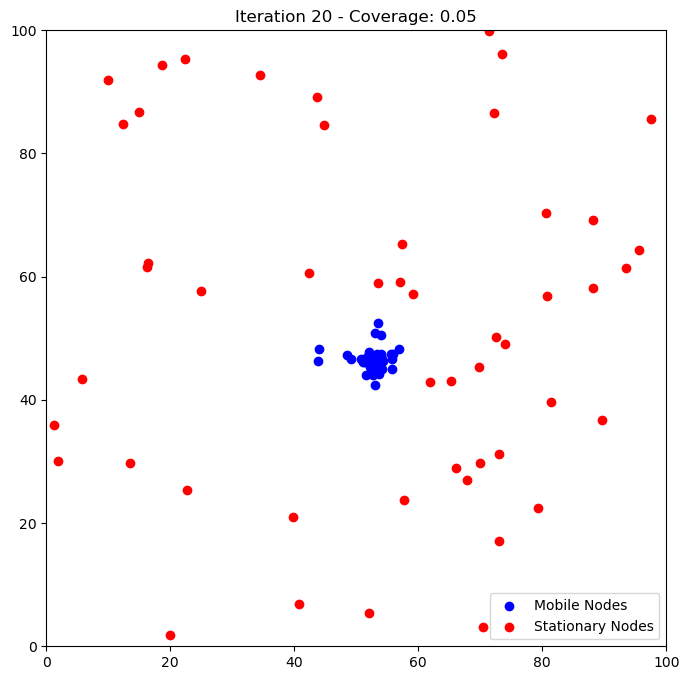

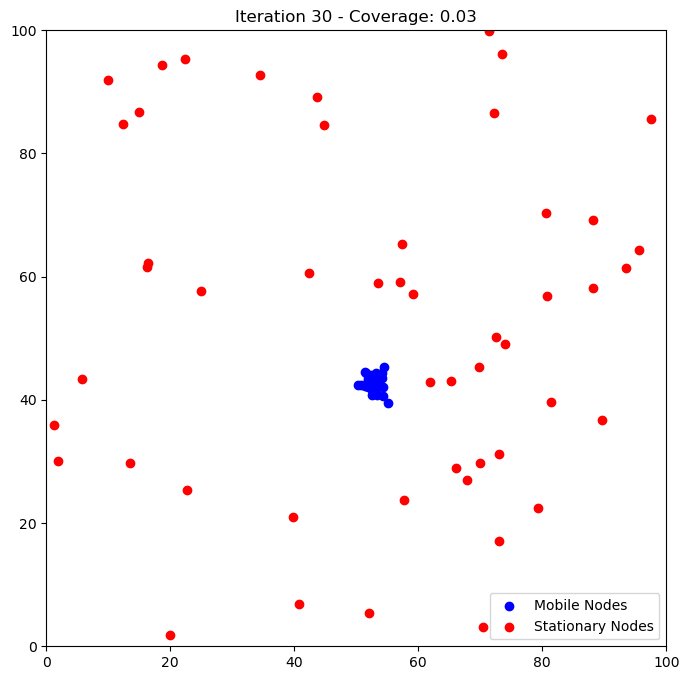

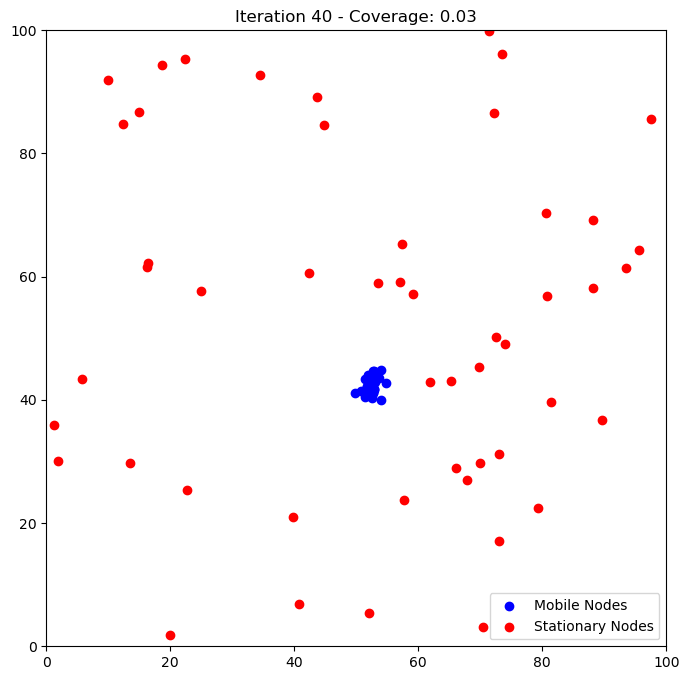

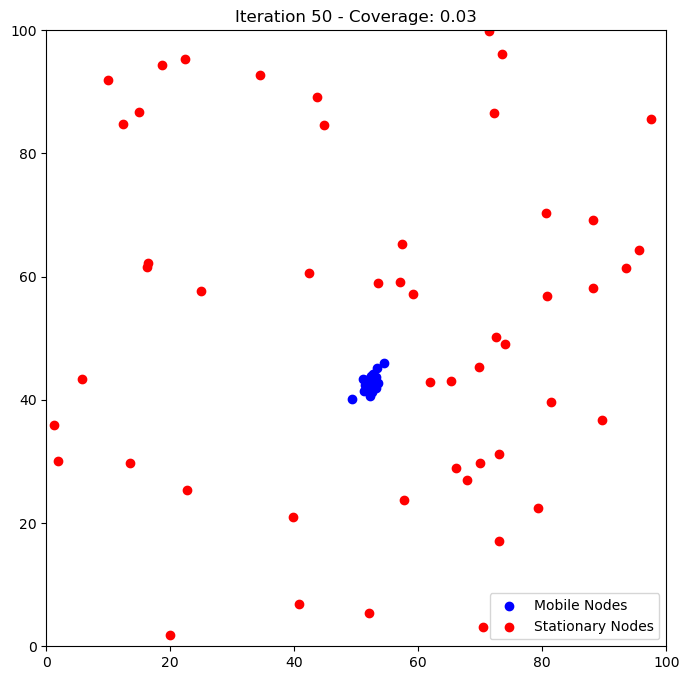

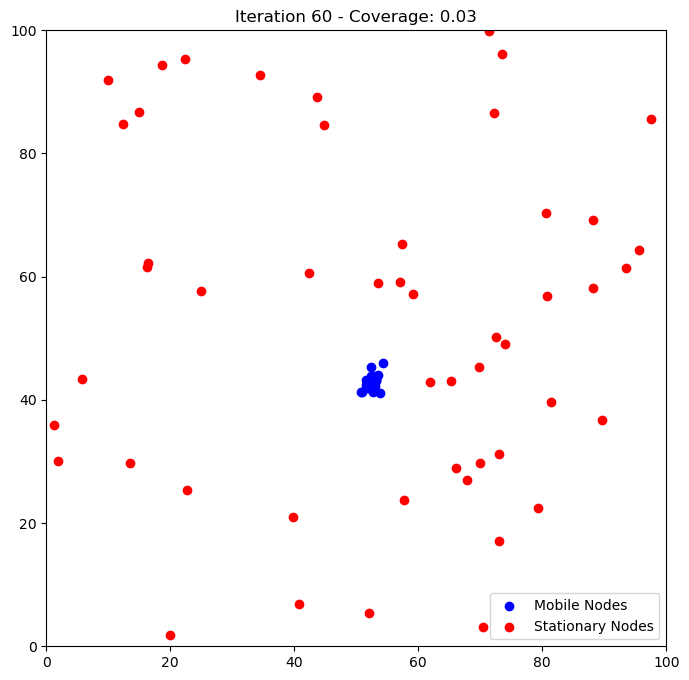

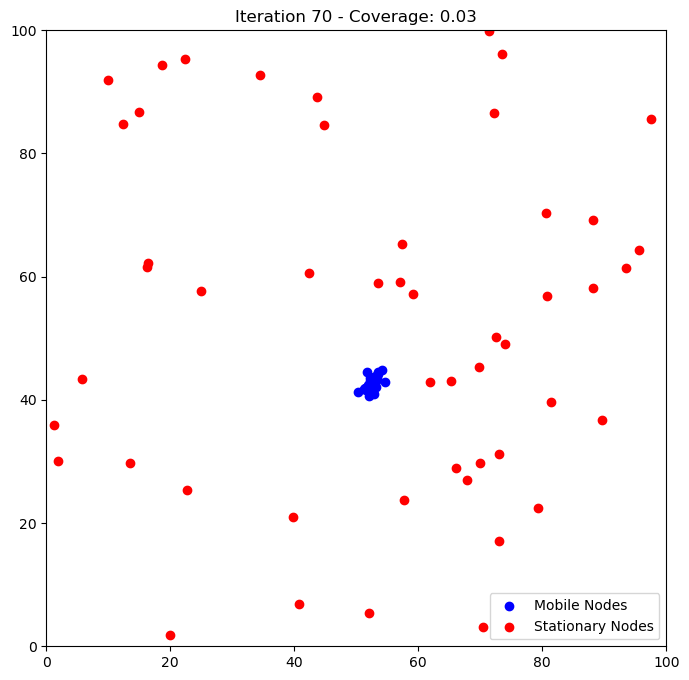

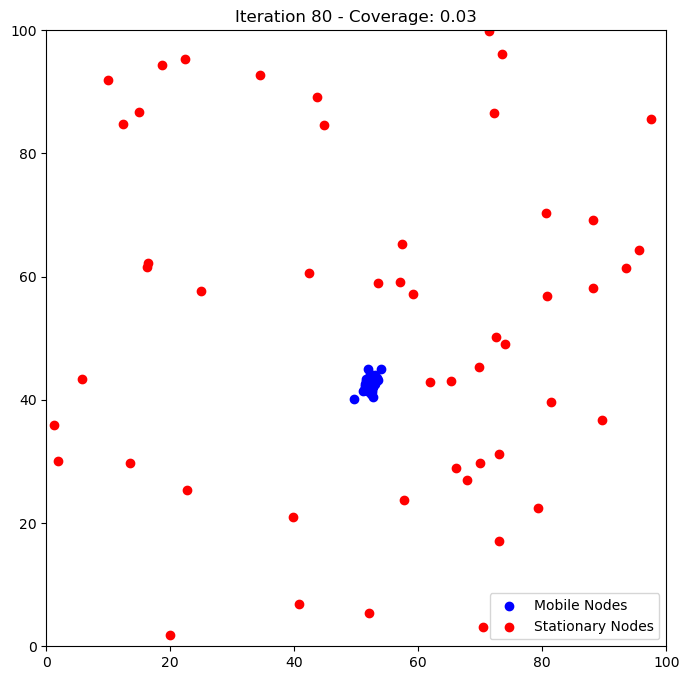

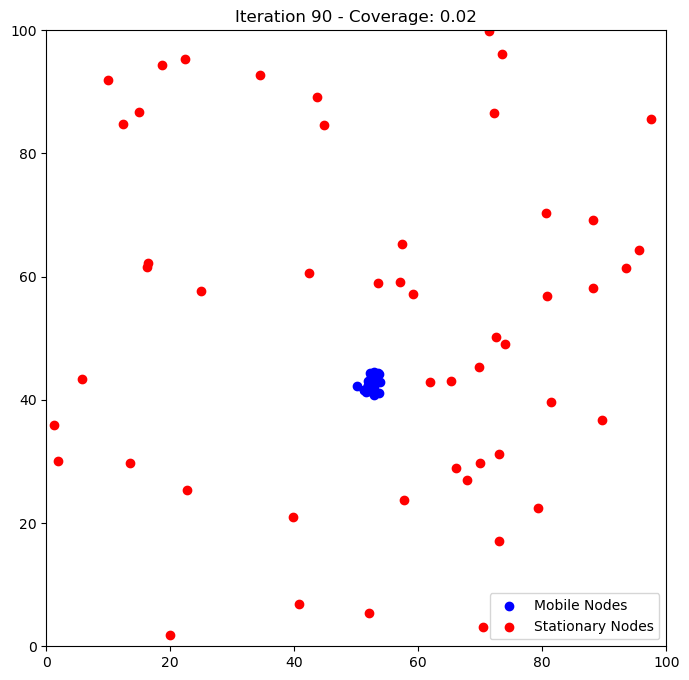

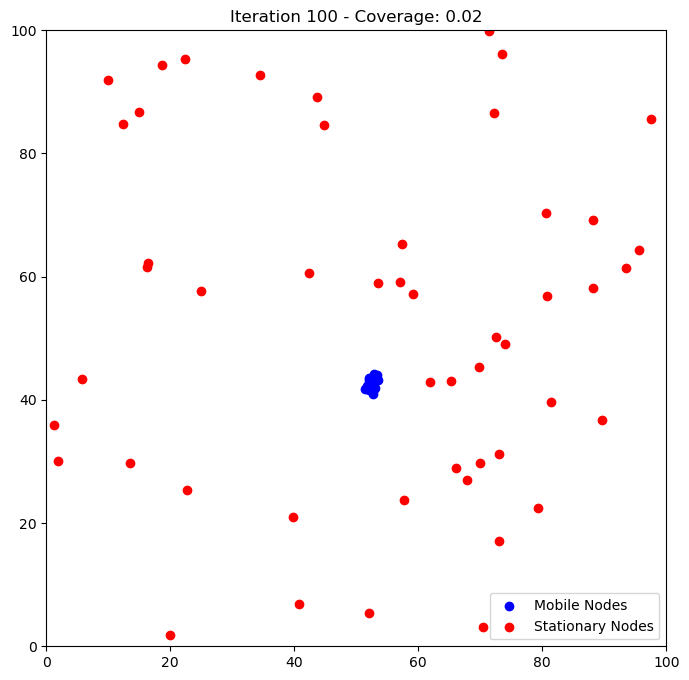

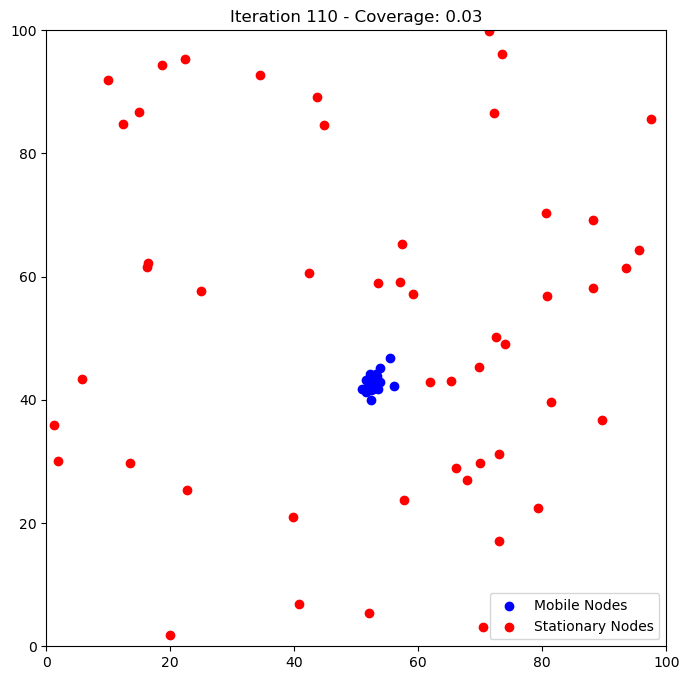

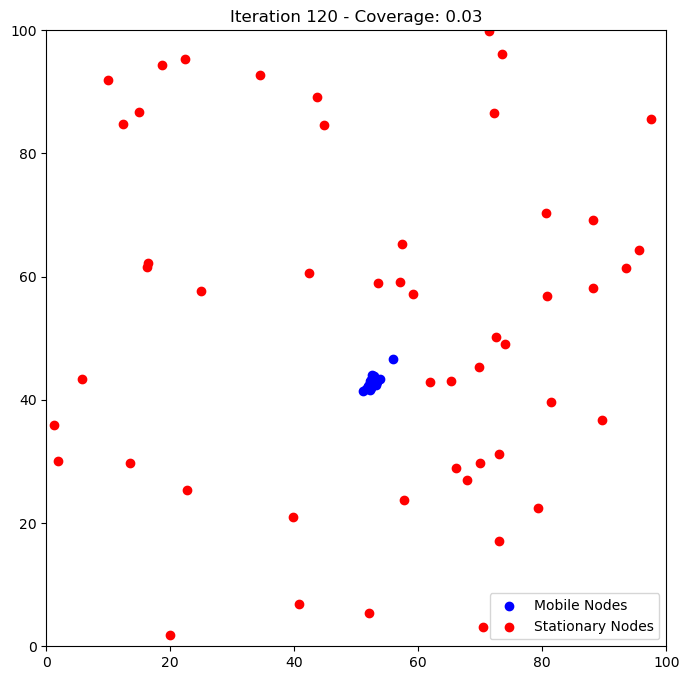

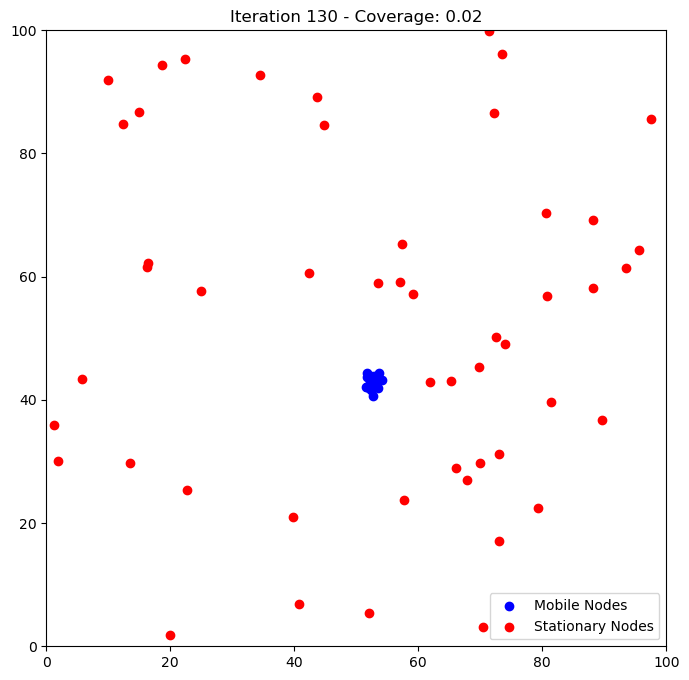

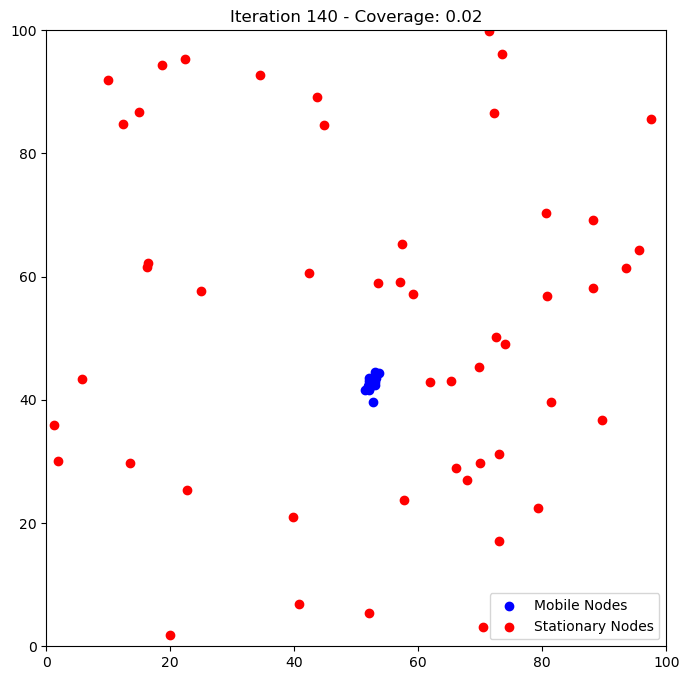

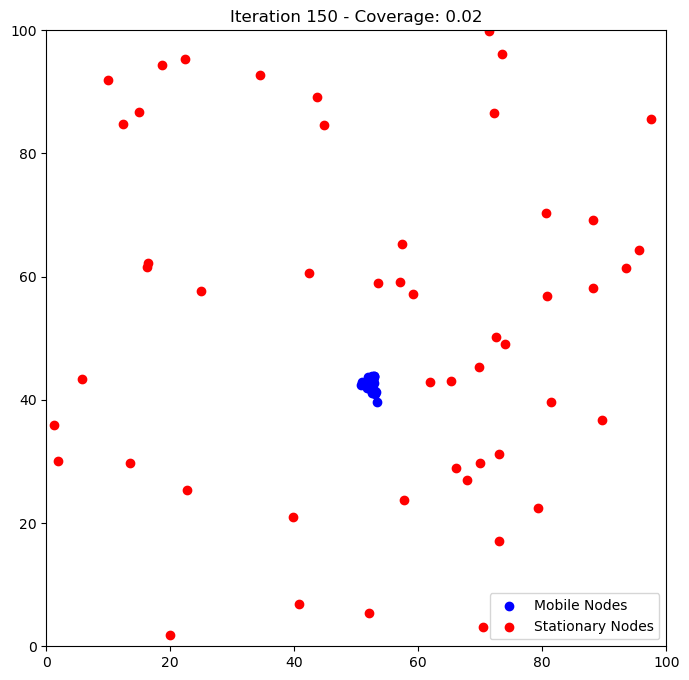

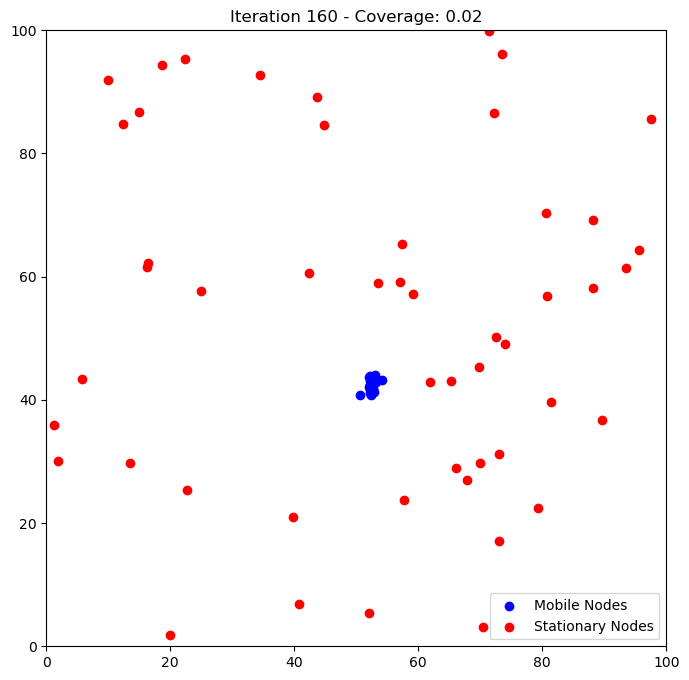

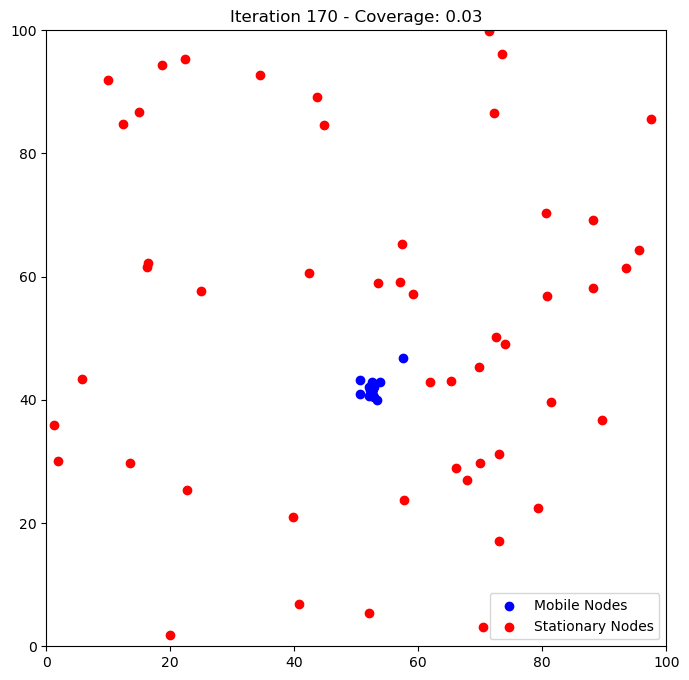

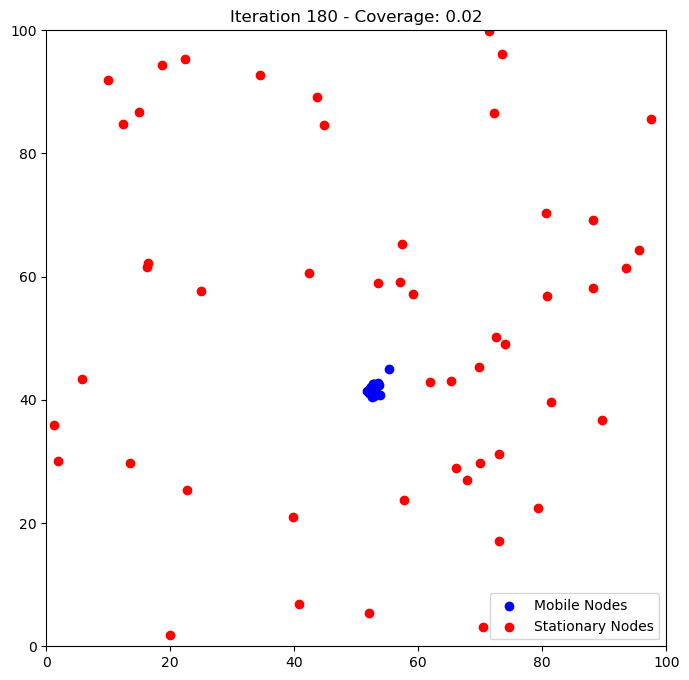

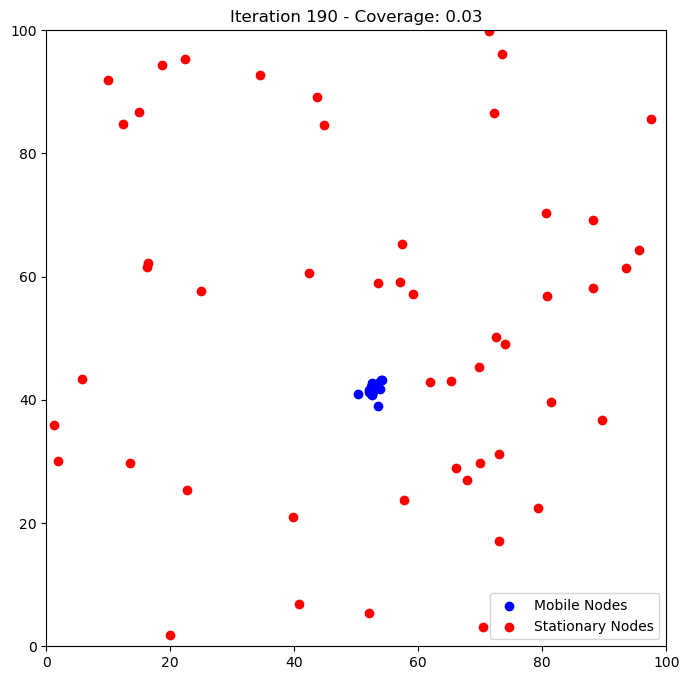

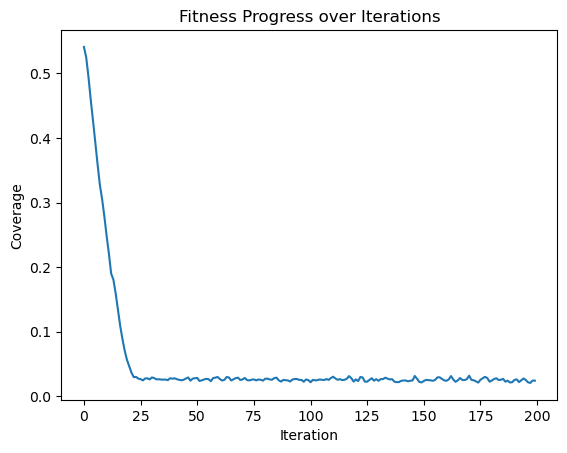

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
NUM_MOBILE_NODES = 50
NUM_STATIONARY_NODES = 50
AREA_SIZE = 100
DETECTION_RADIUS = 7
MAX_ITERATIONS = 200
C1 = 1.5  # cognitive learning factor
C2 = 1.5  # social learning factor
C3 = 0.5  # virtual force factor
W = 0.7  # inertia weight for velocity
MAX_VELOCITY = 2.0
MIN_VELOCITY = -2.0

# Generate random positions for sensor nodes
np.random.seed(0)  # For reproducibility
mobile_nodes = np.random.rand(NUM_MOBILE_NODES, 2) * AREA_SIZE
stationary_nodes = np.random.rand(NUM_STATIONARY_NODES, 2) * AREA_SIZE

# Initialize PSO parameters for mobile nodes
velocities = np.random.rand(NUM_MOBILE_NODES, 2) * MAX_VELOCITY
pbest_positions = np.copy(mobile_nodes)
gbest_position = mobile_nodes[np.random.choice(range(NUM_MOBILE_NODES))]

# Define the virtual force function
def compute_virtual_forces(mobile_nodes, stationary_nodes, detection_radius):
    forces = np.zeros_like(mobile_nodes)
    
    for i, node in enumerate(mobile_nodes):
        force = np.array([0.0, 0.0])
        
        # Repulsive force from stationary nodes
        for stationary_node in stationary_nodes:
            dist = np.linalg.norm(node - stationary_node)
            if dist < detection_radius:
                repulsive_force = (node - stationary_node) / (dist + 1e-6)
                force += repulsive_force
        
        # Attractive force between mobile nodes to maintain coverage
        for j, other_node in enumerate(mobile_nodes):
            if i != j:
                dist = np.linalg.norm(node - other_node)
                if dist > detection_radius:
                    attractive_force = (other_node - node) / (dist + 1e-6)
                    force += attractive_force

        forces[i] = force

    return forces

# Define the fitness function (based on area coverage)
def compute_fitness(nodes, detection_radius):
    grid_size = 1
    grid_points = np.mgrid[0:AREA_SIZE:grid_size, 0:AREA_SIZE:grid_size].reshape(2, -1).T
    covered_points = np.zeros(len(grid_points))

    for node in nodes:
        distances = np.linalg.norm(grid_points - node, axis=1)
        covered_points += distances < detection_radius

    return np.sum(covered_points > 0) / len(grid_points)

# Main VFPSO loop
fitness_progress = []

for iteration in range(MAX_ITERATIONS):
    # Calculate the virtual forces
    forces = compute_virtual_forces(mobile_nodes, stationary_nodes, DETECTION_RADIUS)

    # PSO velocity update with virtual forces
    for i in range(NUM_MOBILE_NODES):
        inertia = W * velocities[i]
        cognitive = C1 * np.random.rand() * (pbest_positions[i] - mobile_nodes[i])
        social = C2 * np.random.rand() * (gbest_position - mobile_nodes[i])
        force_influence = C3 * forces[i]
        
        velocities[i] = inertia + cognitive + social + force_influence

        # Limit velocity to max velocity
        velocities[i] = np.clip(velocities[i], MIN_VELOCITY, MAX_VELOCITY)
        
        # Update positions
        mobile_nodes[i] += velocities[i]

        # Ensure the nodes stay within boundaries
        mobile_nodes[i] = np.clip(mobile_nodes[i], 0, AREA_SIZE)

    # Update personal best (pbest) and global best (gbest) based on fitness
    for i in range(NUM_MOBILE_NODES):
        fitness = compute_fitness(mobile_nodes, DETECTION_RADIUS)
        if fitness > compute_fitness(pbest_positions[i], DETECTION_RADIUS):
            pbest_positions[i] = np.copy(mobile_nodes[i])
    
    if fitness > compute_fitness(gbest_position, DETECTION_RADIUS):
        gbest_position = mobile_nodes[np.argmax([compute_fitness(pos, DETECTION_RADIUS) for pos in mobile_nodes])]

    # Track fitness progress
    fitness_progress.append(fitness)
    
    # Plot the positions and forces (every 10 iterations)
    if iteration % 10 == 0:
        plt.figure(figsize=(8, 8))
        plt.scatter(mobile_nodes[:, 0], mobile_nodes[:, 1], color='b', label='Mobile Nodes')
        plt.scatter(stationary_nodes[:, 0], stationary_nodes[:, 1], color='r', label='Stationary Nodes')
        plt.xlim(0, AREA_SIZE)
        plt.ylim(0, AREA_SIZE)
        plt.title(f'Iteration {iteration} - Coverage: {fitness:.2f}')
        plt.legend()
        plt.show()

# Plot fitness over iterations
plt.plot(fitness_progress)
plt.title('Fitness Progress over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Coverage')
plt.show()


In [33]:
class Sensor:
    def __init__(self, x, y, is_mobile=True):
        self.x = x
        self.y = y
        self.is_mobile = is_mobile

class Particle:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.pbest = position
        self.pbest_fitness = -np.inf

class VFPSO:
    def __init__(self, num_particles, num_sensors, field_size, r, r_e, c_th):
        self.num_particles = num_particles
        self.num_sensors = num_sensors
        self.field_size = field_size
        self.r = r  # sensing radius
        self.r_e = r_e  # range detection error
        self.c_th = c_th  # coverage threshold
        self.particles = []
        self.sensors = []
        self.gbest = None
        self.gbest_fitness = -np.inf
        
        self.initialize_particles()
        self.initialize_sensors()
    
    def initialize_particles(self):
        for _ in range(self.num_particles):
            position = np.random.rand(self.num_sensors * 2) * self.field_size
            velocity = np.random.randn(self.num_sensors * 2)
            self.particles.append(Particle(position, velocity))
    
    def initialize_sensors(self):
        for i in range(self.num_sensors):
            x = np.random.rand() * self.field_size
            y = np.random.rand() * self.field_size
            is_mobile = i < self.num_sensors // 2  # Assuming half are mobile
            self.sensors.append(Sensor(x, y, is_mobile))

    def fitness(self, position):
        coverage = 0
        grid_size = 100
        for i in range(grid_size):
            for j in range(grid_size):
                x = i * self.field_size / grid_size
                y = j * self.field_size / grid_size
                if self.is_covered(x, y, position):
                    coverage += 1
        return coverage / (grid_size * grid_size)

    def is_covered(self, x, y, position):
        for i in range(0, len(position), 2):
            sx, sy = position[i], position[i+1]
            d = np.sqrt((x - sx)**2 + (y - sy)**2)
            if d <= self.r:
                p = np.exp(-self.r_e * (d - self.r))
                if p >= self.c_th:
                    return True
        return False

    def virtual_force(self, position):
        force = np.zeros_like(position)
        for i in range(0, len(position), 2):
            fx, fy = 0, 0
            for j in range(0, len(position), 2):
                if i != j:
                    d = np.sqrt((position[i] - position[j])**2 + (position[i+1] - position[j+1])**2)
                    if d > 2 * self.r:
                        f = 1 / d
                    elif d < self.r:
                        f = -1 / d
                    else:
                        f = 0
                    angle = np.arctan2(position[j+1] - position[i+1], position[j] - position[i])
                    fx += f * np.cos(angle)
                    fy += f * np.sin(angle)
            force[i] = fx
            force[i+1] = fy
        return force
    
    def optimize(self, max_iterations):
        for _ in range(max_iterations):
            for particle in self.particles:
                fitness = self.fitness(particle.position)
                if fitness > particle.pbest_fitness:
                    particle.pbest = particle.position.copy()
                    particle.pbest_fitness = fitness
                
                if fitness > self.gbest_fitness:
                    self.gbest = particle.position.copy()
                    self.gbest_fitness = fitness
            
            for particle in self.particles:
                w = 0.9 - 0.5 * _ / max_iterations
                c1 = c2 = c3 = 1
                r1, r2, r3 = np.random.rand(3)
                
                vf = self.virtual_force(particle.position)
                
                particle.velocity = (w * particle.velocity +
                                     c1 * r1 * (particle.pbest - particle.position) +
                                     c2 * r2 * (self.gbest - particle.position) +
                                     c3 * r3 * vf)
                
                particle.position += particle.velocity
                particle.position = np.clip(particle.position, 0, self.field_size)
        
        return self.gbest, self.gbest_fitness

    def plot_result(self, best_position):
        plt.figure(figsize=(10, 10))
        for i in range(0, len(best_position), 2):
            plt.plot(best_position[i], best_position[i+1], 'bo')
        plt.xlim(0, self.field_size)
        plt.ylim(0, self.field_size)
        plt.title(f'Final Deployment (Coverage: {self.gbest_fitness:.2%})')
        plt.show()
    

In [34]:
if __name__ == "__main__":
    num_particles = 20
    num_sensors = 50
    field_size = 100
    r = 7
    r_e = 3.5
    c_th = 0.9
    max_iterations = 100

    vfpso = VFPSO(num_particles, num_sensors, field_size, r, r_e, c_th)
    best_position, best_fitness = vfpso.optimize(max_iterations)
    
    print(f"Best coverage: {best_fitness:.2%}")
    vfpso.plot_result(best_position)

C:\Users\beich\AppData\Local\Temp\ipykernel_36812\2268975981.py:74: RuntimeWarning: divide by zero encountered in scalar divide
  f = -1 / d
C:\Users\beich\AppData\Local\Temp\ipykernel_36812\2268975981.py:79: RuntimeWarning: invalid value encountered in scalar multiply
  fy += f * np.sin(angle)


KeyboardInterrupt: 